In [3]:
!pip install unidecode

In [4]:
import glob
import os
import string
from unidecode import unidecode

In [5]:
# Define all letters and number of letters
# all_letters = string.ascii_letters + string.digits + " .,;'"
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Helper function to check for non-ASCII characters
def contains_non_ascii(text):
    return any(ord(char) > 127 for char in text)

def normalize(word):
    # Convert to ASCII and remove diacritics using unidecode
    ascii_word = unidecode(word)
    # Keep only allowed characters (lowercase + specified special characters)
    return ''.join(char for char in ascii_word if char in all_letters)

# Helper function to find files
def findFiles(path):
    return glob.glob(path)

# Helper function to read data from file
def read_data(filename):
    all_words = open(filename, encoding='utf-8').read().strip().split('\n')
    # return all_words
    return [normalize(word) for word in all_words]

In [6]:
normalize('Ślusàrski')

'Slusarski'

In [7]:
# Path to text files
path = '/content/drive/MyDrive/RNN/data/names/'

# Initialize dictionaries and lists
category_lines = {}
all_categories = []

# Load data from multiple text files
for filename in findFiles(path + '*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = read_data(filename)
    category_lines[category] = lines

# Print number of categories and the categories themselves
n_categories = len(all_categories)
print(f"Number of categories: {n_categories}")
print(f"Categories: {all_categories}")

print(f"Number of letters: {n_letters}")
for category, lines in category_lines.items():
    print(f"Category: {category}")
    print(lines[:5])


Number of categories: 18
Categories: ['Greek', 'German', 'Korean', 'Dutch', 'Polish', 'Japanese', 'Russian', 'Irish', 'Scottish', 'Arabic', 'Czech', 'Chinese', 'French', 'Spanish', 'Portuguese', 'Italian', 'English', 'Vietnamese']
Number of letters: 57
Category: Greek
['Adamidis', 'Adamou', 'Agelakos', 'Akrivopoulos', 'Alexandropoulos']
Category: German
['Abbing', 'Abel', 'Abeln', 'Abt', 'Achilles']
Category: Korean
['Ahn', 'Baik', 'Bang', 'Byon', 'Cha']
Category: Dutch
['Aalsburg', 'Aalst', 'Aarle', 'Achteren', 'Achthoven']
Category: Polish
['Adamczak', 'Adamczyk', 'Andrysiak', 'Auttenberg', 'Bartosz']
Category: Japanese
['Abe', 'Abukara', 'Adachi', 'Aida', 'Aihara']
Category: Russian
['Ababko', 'Abaev', 'Abagyan', 'Abaidulin', 'Abaidullin']
Category: Irish
['Adam', 'Ahearn', 'Aodh', 'Aodha', 'Aonghuis']
Category: Scottish
['Smith', 'Brown', 'Wilson', 'Campbell', 'Stewart']
Category: Arabic
['Khoury', 'Nahas', 'Daher', 'Gerges', 'Nazari']
Category: Czech
['Abl', 'Adsit', 'Ajdrna', 'Al

In [8]:
# Check for non-ASCII characters
for category, lines in category_lines.items():
    for word in lines:
        if contains_non_ascii(word):
            print(f"Non-ASCII characters found in word: {word}")



In [9]:
print(n_letters)

57


# Prepare Dataset for Training

To represent a single letter, we use a “one-hot vector” of size <1 x n_letters>. A one-hot vector is filled with 0s except for a 1 at index of the current letter, e.g. "b" = <0 1 0 0 0 ...>.

To make a word we join a bunch of those into a 2D matrix <line_length x 1 x n_letters>.

That extra 1 dimension is because PyTorch assumes everything is in batches - we’re just using a batch size of 1 here.

In [10]:
import torch

In [11]:
# Helper function to convert characters to indices
def charToIndex(char):
    return all_letters.find(char)

# Helper function to convert word to tensor (with padding)
def wordToTensor(word):
    tensor = torch.zeros(len(word), 1, n_letters)
    for i, char in enumerate(word):
        tensor[i][0][charToIndex(char)] = 1

    return tensor

In [12]:
print(wordToTensor('adam').size())
print(wordToTensor('adam'))

torch.Size([4, 1, 57])
tensor([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        

In [13]:
print(wordToTensor('abategiovanni'))

tensor([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

# Creating the Network

This RNN module implements a “vanilla RNN” an is just 3 linear layers which operate on an input and hidden state, with a LogSoftmax layer after the output.

In [14]:
n_hidden = 128
import torch.nn as nn
import torch.nn.functional as F

In [15]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        hidden = F.tanh(self.i2h(input) + self.h2h(hidden))
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

To run a step of this network we need to pass an input (in our case, the Tensor for the current letter) and a previous hidden state (which we initialize as zeros at first). We’ll get back the output (probability of each language) and a next hidden state (which we keep for the next step).

In [16]:
rnn = RNN(n_letters, n_hidden, n_categories)
# calling forward function
input = wordToTensor('Albert')
hidden = torch.zeros(1, n_hidden)
# print(input.ndim)
# print(hidden.ndim)
print(hidden)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]])


In [17]:
input

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [18]:
# assume hidden is the previous hidden state (init with zeros)
output, next_hidden = rnn(input[0], hidden)
#  output is a <1 x n_categories> Tensor, where every item is the likelihood of that category (higher is more likely).
print(output)

tensor([[-2.9059, -3.0441, -2.9503, -2.8512, -2.9800, -2.8965, -2.7559, -2.9523,
         -2.8359, -2.7669, -2.8258, -2.9878, -2.9467, -2.8597, -2.8368, -2.8060,
         -3.0086, -2.8757]], grad_fn=<LogSoftmaxBackward0>)


# Training
Before going into training we should make a few helper functions. The first is to interpret the output of the network, which we know to be a likelihood of each category. We can use Tensor.topk to get the index of the greatest value:

In [19]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Russian', 6)


In [20]:
# Generate 'n' random training examples
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    word = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    word_tensor = wordToTensor(word)
    return category, word, category_tensor, word_tensor

for i in range(10):
    category, word, category_tensor, word_tensor = randomTrainingExample()
    print(f"{category} -> {word}")

Czech -> Blecha
German -> Andres
Czech -> Tykal
Irish -> Ivor
German -> Schuchert
Korean -> Choi
English -> Williams
Spanish -> Rios
Dutch -> Kool
Korean -> Choi


# Training the Network
Train this network by showing it a bunch of examples, have it make guesses, and tell it if it’s wrong.

For the loss function nn.NLLLoss is appropriate, since the last layer of the RNN is nn.LogSoftmax.



In [21]:
criterion = nn.NLLLoss()


In [22]:
learning_rate = 0.005

def train(category_tensor, word_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()
#    word= 'Adam'
#    word_tensor.size() = torch.Size([4, 1, 57])
    for i in range(word_tensor.size()[0]):
        output, hidden = rnn(word_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [27]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

# Keep track of losses and accuracy for plotting
current_loss = 0
all_losses = []
correct_predictions = 0
total_predictions = 0

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, word, category_tensor, word_tensor = randomTrainingExample()
    output, loss = train(category_tensor, word_tensor)
    current_loss += loss

    # Compute the guess and update counters
    guess, guess_i = categoryFromOutput(output)
    correct = '✓' if guess == category else '✗ (%s)' % category
    if guess == category:
        correct_predictions += 1
    total_predictions += 1

    # Print ``iter`` number, loss, name, guess, and accuracy
    if iter % print_every == 0:
        accuracy = (correct_predictions / total_predictions) * 100
        print('%d %d%% (%s) %.4f %s / %s %s | Accuracy: %.2f%%' % (
            iter, iter / n_iters * 100, timeSince(start), loss, word, guess, correct, accuracy))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0
        # Reset counters for the next plot interval
        correct_predictions = 0
        total_predictions = 0


5000 5% (0m 10s) 2.0773 Albert / Dutch ✗ (German) | Accuracy: 55.10%
10000 10% (0m 20s) 5.9012 Fabian / Irish ✗ (Polish) | Accuracy: 57.20%
15000 15% (0m 30s) 0.9172 Lam / Chinese ✗ (Vietnamese) | Accuracy: 58.70%
20000 20% (0m 41s) 1.1301 Gillett / English ✓ | Accuracy: 56.30%
25000 25% (0m 52s) 0.0097 Zdunowski / Polish ✓ | Accuracy: 60.70%
30000 30% (1m 1s) 0.1339 Lac / Vietnamese ✓ | Accuracy: 64.10%
35000 35% (1m 12s) 0.1341 Morrison / Scottish ✓ | Accuracy: 62.70%
40000 40% (1m 22s) 0.7224 Kiely / English ✓ | Accuracy: 63.70%
45000 45% (1m 33s) 1.0703 Guirguis / Arabic ✓ | Accuracy: 69.00%
50000 50% (1m 43s) 0.2610 Reynders / Dutch ✓ | Accuracy: 65.10%
55000 55% (1m 53s) 1.3943 Suess / Dutch ✗ (German) | Accuracy: 65.50%
60000 60% (2m 3s) 0.0282 Costantini / Italian ✓ | Accuracy: 71.50%
65000 65% (2m 14s) 0.1414 Henderson / Scottish ✓ | Accuracy: 71.80%
70000 70% (2m 24s) 0.5297 Luc / Vietnamese ✓ | Accuracy: 71.20%
75000 75% (2m 35s) 0.2270 Ikina / Japanese ✓ | Accuracy: 68.80%


# Plotting the Results


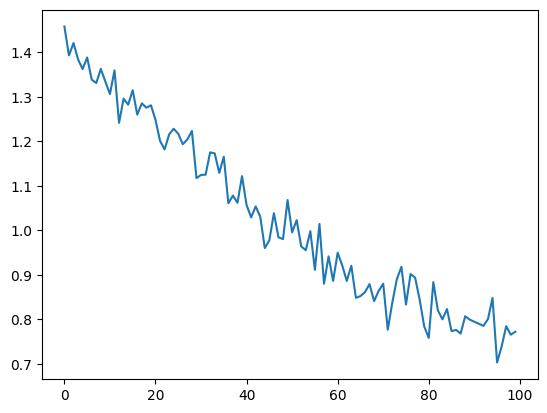

In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

To calculate the confusion matrix a bunch of samples are run through the network with evaluate(), which is the same as train() minus the backprop.

<ipython-input-29-8d6e6a430c20>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-29-8d6e6a430c20>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


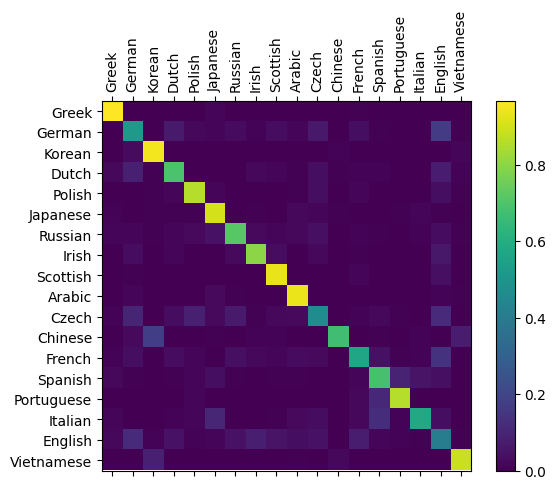

In [29]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(word_tensor):
    hidden = rnn.initHidden()

    for i in range(word_tensor.size()[0]):
        output, hidden = rnn(word_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, word, category_tensor, word_tensor = randomTrainingExample()
    output = evaluate(word_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

# Running on User Input


In [30]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(wordToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])



In [31]:
predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-1.10) Russian
(-1.18) English
(-1.27) Czech

> Jackson
(-0.05) Scottish
(-3.12) English
(-7.04) Russian

> Satoshi
(-0.51) Greek
(-1.24) Japanese
(-2.89) Polish


In [ ]:
# Let's rewrite the necessary parts to include batch processing and batch normalization.
updated_code = """
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

# Define the RNN class
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2, dropout=0.5):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # RNN Layer with multiple layers and dropout
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=num_layers, batch_first=True, dropout=dropout)

        # Batch normalization layer for stabilizing inputs
        self.batch_norm = nn.BatchNorm1d(hidden_size)

        # Fully connected layer for classification
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, input_tensor, hidden, lengths):
        # Pack padded sequence for variable-length inputs
        packed_input = pack_padded_sequence(input_tensor, lengths, batch_first=True, enforce_sorted=False)

        # Pass through RNN
        packed_output, hidden = self.rnn(packed_input, hidden)

        # Unpack the sequence
        output, _ = pad_packed_sequence(packed_output, batch_first=True)

        # Apply batch normalization on the output
        output = self.batch_norm(output.contiguous().view(-1, output.size(2)))

        # Use the last time step for classification
        output = self.fc(output)

        return output, hidden

    def init_hidden(self, batch_size):
        # Initialize hidden state with zeros
        return torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)


# Changes for batch processing:
# - Ensure data loading and tensor operations are performed on the GPU.
# - Use `collate_fn` to properly manage batch data, sequence lengths, and padding.
# - Apply batch normalization on the output of the RNN before passing it to the fully connected layer.
"""

# Save the updated code into a new file for further use.
updated_file_path = '/mnt/data/rnn_part1_updated.py'
with open(updated_file_path, 'w') as updated_file:
    updated_file.write(updated_code)

updated_file_path  # Returning the path to the updated file.
